# Support Vector Machine (SVM)

### Objective: Model Setup and Tuning 

10/4/2018 <br>
Mooyoung Lee


### SVM understanding:
- It utilize hiperplanes to separate groups by maximizing margines.
- Kernel trick can be utilized to separate data that is not separable linearly.  
- Kernel trick add features such as squared values or absolute values of feature data.
- As regularization value, 'C', increases the decision boundary become more complex and lead to overfitting.

## Iris dataset

In [1]:
from sklearn import datasets
iris = datasets.load_iris()
print(iris['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [2]:
import pandas as pd
import numpy as np

X = pd.DataFrame(iris.data, columns = iris.feature_names)
y = iris.target.astype(np.int)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
X.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

# Scale data

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
X_scaled = scaler.fit_transform(X)

In [5]:
X_scaled.min(), X_scaled.max()

(0.0, 1.0)

# Support Vector Machine

Accuracy check w/ stratified 10-fold cross-validation

In [6]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
clf = SVC()
accuracy = cross_val_score(clf, X_scaled, y, cv = 10)
print('Accuracy: ', np.round(accuracy,3))
print('Mean Accuracy: ', np.mean(accuracy))

Accuracy:  [1.    0.933 1.    0.933 1.    0.933 0.867 1.    1.    1.   ]
Mean Accuracy:  0.9666666666666666


# Tuning w/ kernel and regularization strength

The smaller value of 'C' specify stronger regularization.

In [7]:
from sklearn.model_selection import RandomizedSearchCV

tuned_parameters = {'kernel' : ['linear','poly','rbf','sigmoid'],
                   'C' : [.0001, .001, .01, .1, .5, 1, 10, 100]}

clf = RandomizedSearchCV(SVC(), tuned_parameters, cv=10, n_iter = 14)
clf.fit(X,y)


## Print Results
print("Best parameters set found on development set:\n")
print(clf.best_params_)
print("Grid scores on development set:\n")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

Best parameters set found on development set:

{'kernel': 'linear', 'C': 0.5}
Grid scores on development set:

0.987 (+/-0.053) for {'kernel': 'linear', 'C': 0.5}
0.060 (+/-0.202) for {'kernel': 'sigmoid', 'C': 0.5}
0.973 (+/-0.088) for {'kernel': 'rbf', 'C': 10}
0.920 (+/-0.100) for {'kernel': 'linear', 'C': 0.01}
0.973 (+/-0.088) for {'kernel': 'poly', 'C': 10}
0.960 (+/-0.107) for {'kernel': 'poly', 'C': 0.001}
0.907 (+/-0.122) for {'kernel': 'linear', 'C': 0.001}
0.973 (+/-0.088) for {'kernel': 'poly', 'C': 0.5}
0.060 (+/-0.202) for {'kernel': 'sigmoid', 'C': 100}
0.967 (+/-0.089) for {'kernel': 'rbf', 'C': 100}
0.973 (+/-0.088) for {'kernel': 'poly', 'C': 1}
0.973 (+/-0.065) for {'kernel': 'linear', 'C': 0.1}
0.933 (+/-0.084) for {'kernel': 'rbf', 'C': 0.0001}
0.873 (+/-0.111) for {'kernel': 'poly', 'C': 0.0001}


# SVM trained w/ all dataset

In [8]:
clf = SVC(kernel = 'linear', C = 0.5)
clf.fit(X,y)

SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# Support Vector Parameters

In [9]:
X.shape

(150, 4)

In [10]:
clf.support_vectors_[0:5]

array([[5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [4.5, 2.3, 1.3, 0.3],
       [6.9, 3.1, 4.9, 1.5],
       [6.5, 2.8, 4.6, 1.5]])

In [11]:
print(clf.support_vectors_.shape)
print(clf.n_support_)

(34, 4)
[ 3 16 15]


In [12]:
print(clf.coef_)

[[-0.03545956  0.45140371 -0.87612024 -0.39807035]
 [-0.00722313  0.17894121 -0.53836459 -0.29239263]
 [ 0.47395416  0.46608902 -1.83627064 -1.7006552 ]]


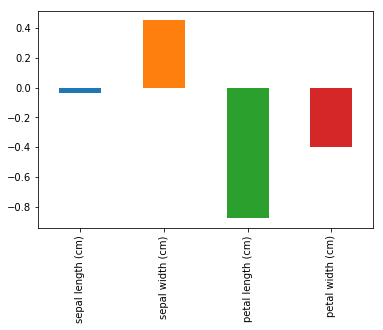

In [13]:
from matplotlib import pyplot as plt
%matplotlib inline
weights = pd.Series(clf.coef_[0], index = X.columns)
weights.plot(kind = 'bar')